In [25]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [26]:
# G1 >> obj
# G2 >> scene

In [27]:
sift = cv2.xfeatures2d.SIFT_create() # opencv 3

I2 = cv2.imread('../Data/scene.jpg')
G2 = cv2.cvtColor(I2,cv2.COLOR_BGR2GRAY)

keypoints2, desc2 = sift.detectAndCompute(G2, None); # opencv 3

fnames = glob.glob('../Data/obj?.jpg')
fnames.sort()

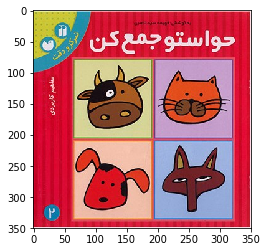

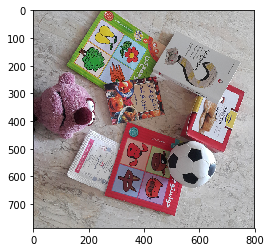

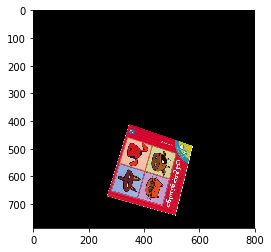

In [28]:
# for fname in fnames:
fname = fnames[0]

I1 = cv2.imread(fname)

plt.imshow(I1[:,:,::-1])
plt.show()

G1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)
keypoints1, desc1 = sift.detectAndCompute(G1, None); # opencv 3

# brute-force matching
bf = cv2.BFMatcher()

matches = bf.knnMatch(desc1,desc2, k=2)

good_matches = []
alpha = 0.75
for m1,m2 in matches:
    # m1 is the best match
    # m2 is the second best match
    if m1.distance < alpha * m2.distance:
        good_matches.append(m1)  

points1 = [keypoints1[m.queryIdx].pt for m in good_matches]
points1 = np.array(points1,dtype=np.float32)

points2 = [keypoints2[m.trainIdx].pt for m in good_matches]
points2 = np.array(points2,dtype=np.float32)

H, mask = cv2.findHomography(points1, points2, cv2.RANSAC,5.0) # 5 pixels margin

J = cv2.warpPerspective(I1, H, (I2.shape[1],I2.shape[0]))

plt.imshow(I2[:,:,::-1])
plt.show()

plt.imshow(J[:,:,::-1])
plt.show()

In [4]:
# for fname in fnames:

#     I1 = cv2.imread(fname)
#     G1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)
#     keypoints1, desc1 = sift.detectAndCompute(G1, None); # opencv 3
    
# ### my codes

#     # brute-force matching
#     bf = cv2.BFMatcher()

#     matches = bf.knnMatch(desc1,desc2, k=2)

#     good_matches = []
#     alpha = 0.75
#     for m1,m2 in matches:
#         # m1 is the best match
#         # m2 is the second best match
#         if m1.distance < alpha * m2.distance:
#             good_matches.append(m1)  

#     points1 = [keypoints1[m.queryIdx].pt for m in good_matches]
#     points1 = np.array(points1,dtype=np.float32)

#     points2 = [keypoints2[m.trainIdx].pt for m in good_matches]
#     points2 = np.array(points2,dtype=np.float32)

#     H, mask = cv2.findHomography(points1, points2, cv2.RANSAC,5.0) # 5 pixels margin
    
# ### end of my codes

#     J = cv2.warpPerspective(I1, H, (I2.shape[1],I2.shape[0]))

#     # alternatingly show images I2 and J
#     ind = 0;
#     imgs = [I2, J]
#     while 1:
#         ind = 1-ind

#         cv2.imshow('Reg',imgs[ind])
#         key =  cv2.waitKey(800) 
                
#         if key & 0xFF == ord('q'):
#             exit()
#         elif key & 0xFF != 0xFF:
#             break

# cv2.destroyAllWindows()